<a href="https://colab.research.google.com/github/Jeffrowetull/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/waterpump.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-  amount_tsh : Total static head (amount water available to waterpoint)
- date_recorded : The date the row was entered
- funder : Who funded the well
- gps_height : Altitude of the well
- installer : Organization that installed the well
- longitude : GPS coordinate
- latitude : GPS coordinate
- wpt_name : Name of the waterpoint if there is one
- num_private : No info given
- basin : Geographic water basin
- subvillage : Geographic location
- region : Geographic location
- region_code : Geographic location (coded)
- district_code : Geographic location (coded)
- lga : Geographic location
- ward : Geographic location
- population : Population around the well
- public_meeting : True/False
- recorded_by : Group entering this row of data
- scheme_management : Who operates the waterpoint
- scheme_name : Who operates the waterpoint
- permit : If the waterpoint is permitted
- construction_year : Year the waterpoint was constructed
- extraction_type : The kind of extraction the waterpoint uses
- extraction_type_group : The kind of extraction the waterpoint uses
- extraction_type_class : The kind of extraction the waterpoint uses
- management : How the waterpoint is managed
- management_group : How the waterpoint is managed
- payment : What the water costs
- payment_type : What the water costs
- water_quality : The quality of the water
- quality_group : The quality of the water
- quantity : The quantity of water
- quantity_group : The quantity of water
- source : The source of the water
- source_type : The source of the water
- source_class : The source of the water
- waterpoint_type : The kind of waterpoint
- waterpoint_type_group : The kind of waterpoint

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Jeffrowetull/DS-Unit-2-Sprint-5-Water-Pump-Challenge/master/train_features.csv'
url2 = 'https://raw.githubusercontent.com/Jeffrowetull/DS-Unit-2-Sprint-5-Water-Pump-Challenge/master/train_labels.csv'

train_features = pd.read_csv(url)
train_target = pd.read_csv(url2)
print( train_features.head())
print(train_target.head().T)

      id  amount_tsh  ...              waterpoint_type waterpoint_type_group
0  69572      6000.0  ...           communal standpipe    communal standpipe
1   8776         0.0  ...           communal standpipe    communal standpipe
2  34310        25.0  ...  communal standpipe multiple    communal standpipe
3  67743         0.0  ...  communal standpipe multiple    communal standpipe
4  19728         0.0  ...           communal standpipe    communal standpipe

[5 rows x 40 columns]
                       0           1           2               3           4
id                 69572        8776       34310           67743       19728
status_group  functional  functional  functional  non functional  functional


In [2]:
df = pd.merge(train_features,train_target, how='outer')
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [4]:
df.describe(include='number')

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [5]:
df.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,56066,59400,55523,31234,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,2,1,12,2696,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6,3
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259


#Baseline (54%)

In [6]:
base = df['status_group'].replace({'functional':1,'non functional':3, 'functional needs repair':2 })
base.value_counts(normalize=True)

1    0.543081
3    0.384242
2    0.072677
Name: status_group, dtype: float64

In [7]:
majority=base.mode()[0]
y_pred=[majority]*len(base)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
print(accuracy_score(base,y_pred))
print('How is this different than the value counts?')


0.543080808080808
How is this different than the value counts?


#Fast Model (54%, 51%, 69%)

##Decision Sapling Numeric Only (54%)

In [8]:
from sklearn.model_selection import train_test_split
X_numeric= df.drop(columns='status_group').select_dtypes('number')
y = base


X_train, X_val, y_train, y_val =train_test_split(X_numeric,y, random_state=24, stratify=y)
X_train.shape

(44550, 10)

In [9]:
X_train.isnull().sum().sort_values()

id                   0
amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
region_code          0
district_code        0
population           0
construction_year    0
dtype: int64

In [0]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_val)
y_pred_proba = tree.predict_proba(X_val)[:,1]



In [11]:
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)
multiclass_roc_auc_score(y_val,y_pred)

0.5393861225256901

##Logistic Regression Numeric Only (51%, 52% with standard scaling)

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_val)
multiclass_roc_auc_score(y_val,y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.515789454640326

In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(
StandardScaler(),
LogisticRegression(solver='lbfgs',max_iter=1000)
)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_val)
multiclass_roc_auc_score(y_val, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5160470148611064

##Logistic With Low Cardinality Categoricals (69% with OneHotEncoder)

In [14]:
!pip install category_encoders

     |████████████████████████████████| 92kB 5.4MB/s 


In [0]:
import category_encoders as ce
X = df.drop(columns = 'status_group')

X_train, X_val, y_train, y_val = train_test_split(
X, y, random_state=24, stratify=y)

X_train.select_dtypes(exclude='number').nunique()
X_train_simple = X_train.drop(columns =['date_recorded','funder','installer','wpt_name','subvillage','ward','scheme_name'])
X_val_simple = X_val.drop(columns =['date_recorded','funder','installer','wpt_name','subvillage','ward','scheme_name'])

In [16]:
pipeline = make_pipeline(
ce.OneHotEncoder(use_cat_names=True),
StandardScaler(),
LogisticRegression(solver='lbfgs', max_iter=1000)
)

pipeline.fit(X_train_simple, y_train)
y_pred = pipeline.predict(X_val_simple)
multiclass_roc_auc_score(y_val, y_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.6935011193225389

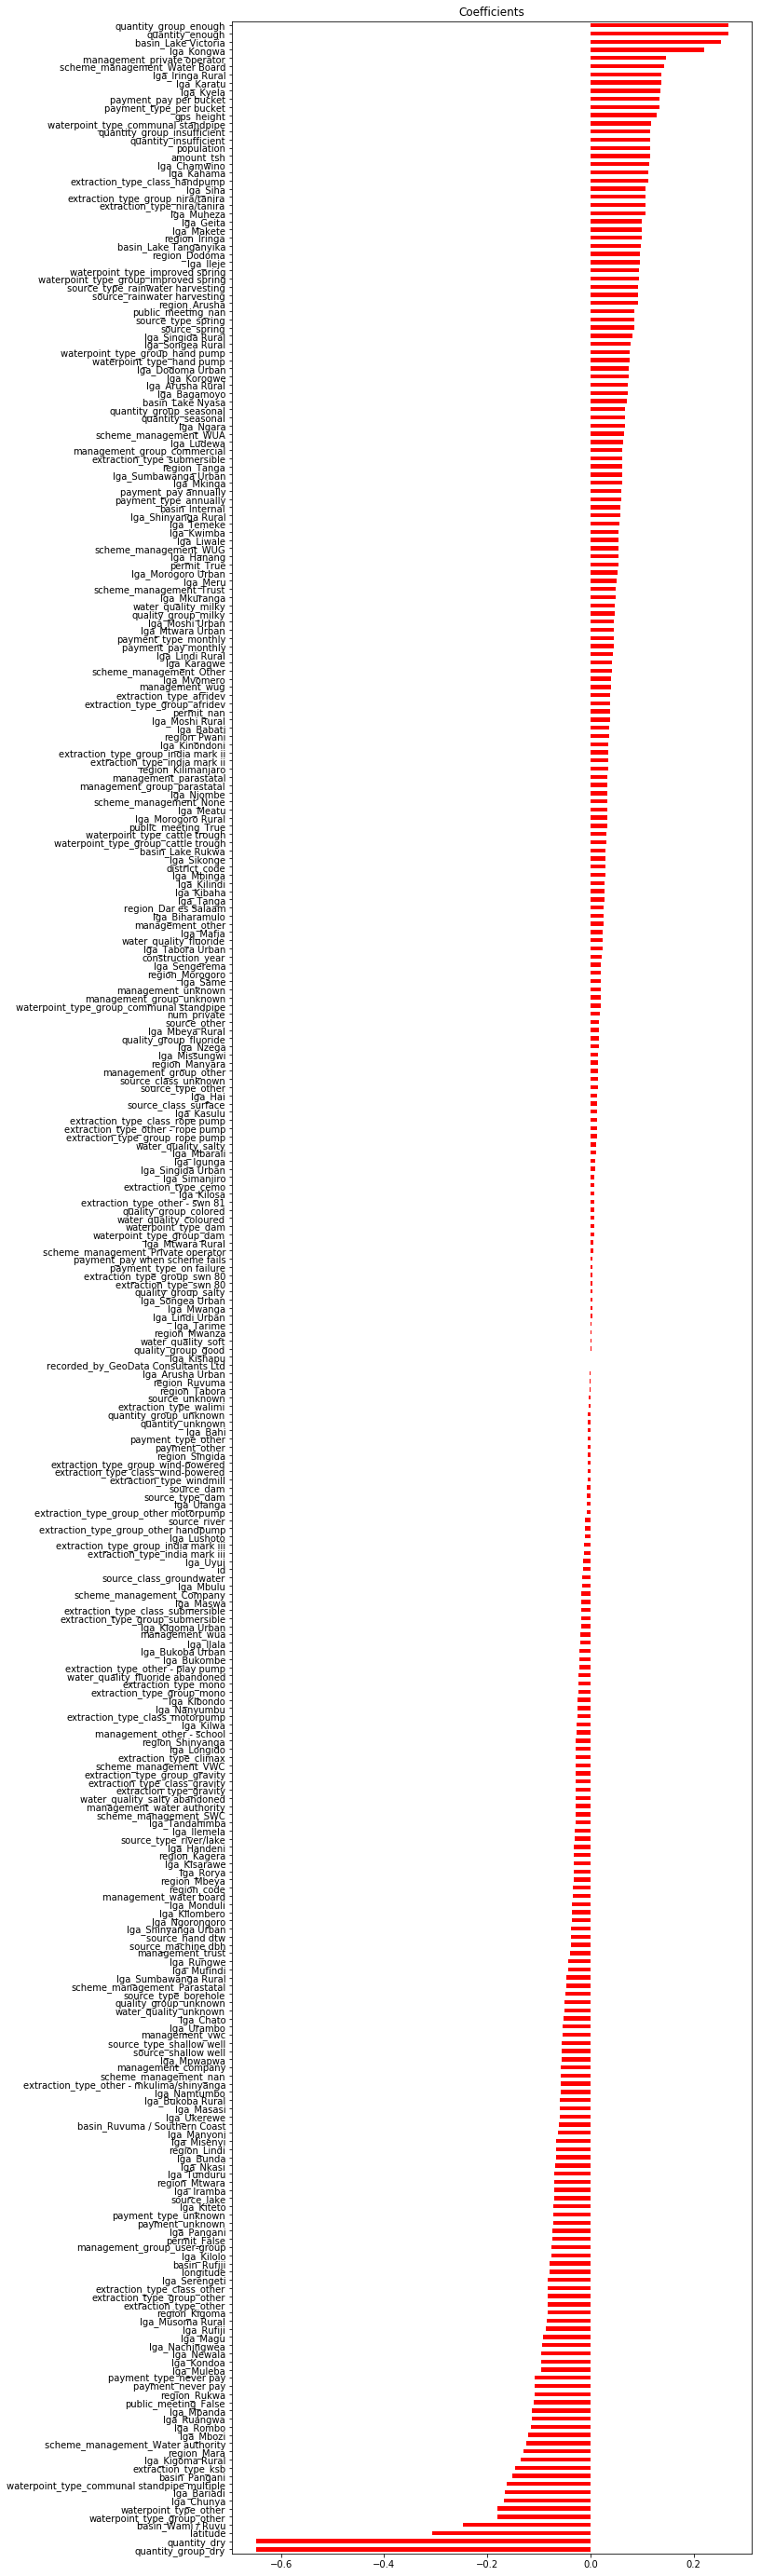

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize =(10,50))
plt.title('Coefficients')
coefficients = pipeline.named_steps['logisticregression'].coef_[0]
feature_names = pipeline.named_steps['onehotencoder'].transform(X_train_simple).columns
pd.Series(coefficients, feature_names).sort_values().plot.barh(color='red')

#Wrangle 
##***Yee-haw***

In [18]:
X_train.isnull().sum().sort_values()

id                           0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
construction_year            0
payment_type                 0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
water_quality                0
waterpoint_type              0
recorded_by                  0
basin                        0
amount_tsh                   0
date_recorded                0
gps_height                   0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
population                   0
waterpoint_type_group        0
region                       0
region_code                  0
district_code                0
lga                          0
ward    

In [19]:
X_train.subvillage.count()

44267

In [20]:
many_nulls = ['subvillage','permit','public_meeting','funder','installer','scheme_management','scheme_name']

for column in many_nulls:
  print(column,'unique:',X_train[column].nunique())
  print(column,'nulls:',X_train[column].isnull().sum(),
        'percentage of whole:',X_train[column].isnull().sum()/X_train[column].count()*100,'%','\n')
  
X_train[many_nulls].describe()

subvillage unique: 16718
subvillage nulls: 283 percentage of whole: 0.6393024148914541 % 

permit unique: 2
permit nulls: 2292 percentage of whole: 5.423825074542099 % 

public_meeting unique: 2
public_meeting nulls: 2498 percentage of whole: 5.940264434509655 % 

funder unique: 1630
funder nulls: 2735 percentage of whole: 6.540715054406314 % 

installer unique: 1865
installer nulls: 2743 percentage of whole: 6.561102207764249 % 

scheme_management unique: 12
scheme_management nulls: 2915 percentage of whole: 7.001321003963012 % 

scheme_name unique: 2483
scheme_name nulls: 21092 percentage of whole: 89.913888652059 % 



,subvillage,permit,public_meeting,funder,installer,scheme_management,scheme_name
count,44267,42258,42052,41815,41807,41635,23458
unique,16718,2,2,1630,1865,12,2483
top,Shuleni,True,True,Government Of Tanzania,DWE,VWC,K
freq,390,29184,38321,6831,13115,27645,521


In [0]:
def wrangle(X):
  X = X.copy()
  
  #drop things?
  X = X.drop(columns = ['scheme_name'])
  
  #dates?
  X['year_recorded'] = pd.DatetimeIndex(X['date_recorded']).year
  X['month_recorded'] = pd.DatetimeIndex(X['date_recorded']).month
  X['day_recorded'] = pd.DatetimeIndex(X['date_recorded']).day
  X = X.drop(columns='date_recorded')
  
  #rename for reading's sake
  X = X.rename({'amount_tsh':'total_water', 'wpt_name':'pump_name', 'lga':'geo_loc'}, axis = 'columns')
  
  #nulls?
  X['permit'] = X['permit'].fillna(False)
  X = X.fillna('n/a')
  X['construction_year'] = X['construction_year'].replace(0,1985)
  
  #feature engineer?
  
  #time since construction
  X['years_since_cons'] = X['year_recorded']-X['construction_year']
  
  return X

In [0]:
X_wr = wrangle(X)




In [0]:
encoder = ce.LeaveOneOutEncoder()

X_encoded = encoder.fit_transform(X_wr,y)



#Logistic Regression (73% on kaggle!)


In [0]:
url3= 'https://raw.githubusercontent.com/Jeffrowetull/DS-Unit-2-Sprint-5-Water-Pump-Challenge/master/test_features.csv'
X_test = pd.read_csv(url3)
X_test = wrangle(X_test)
X_test = encoder.transform(X_test)

In [0]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_encoded,y)
y_pred = model.predict(X_test)

In [0]:
y_pred=pd.DataFrame(y_pred)

In [0]:
y_pred= y_pred.rename({0:'status_group'},axis=1)

In [0]:
y_pred = y_pred.replace({1:'functional', 3:'non functional', 2:'functional needs repair'})

#Submission function

In [0]:


def create_submission(y_test_pred):
    sample_submission = pd.read_csv('sample_submission.csv')
    submission = sample_submission.copy()
    submission['status_group'] = y_test_pred
    
    now = pd.to_datetime('now')
    filename = 'MB_' + str(now).replace(' ','_')[0:-7] 
    
    submission.to_csv(f'{filename}.csv', index=False)
    


In [0]:
create_submission(y_pred)

#Gradient Booster

array([2, 2, 2, ..., 2, 2, 2])